In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skm
import sklearn.linear_model as skl

## Estimar el costo de un seguro

In [2]:
df = pd.read_csv("insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [96]:
df.sex.replace(('female', 'male'),(1,2), inplace = True)
df.smoker.replace(('yes', 'no'),(1,2), inplace = True)
df.region.replace(('southwest', 'southeast', 'northwest', 'northeast'),(1,2,3,4), inplace = True)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520
5,31,1,25.740,0,2,2,3756.62160
6,46,1,33.440,1,2,2,8240.58960
7,37,1,27.740,3,2,3,7281.50560
8,37,2,29.830,2,2,4,6406.41070
9,60,1,25.840,0,2,3,28923.13692


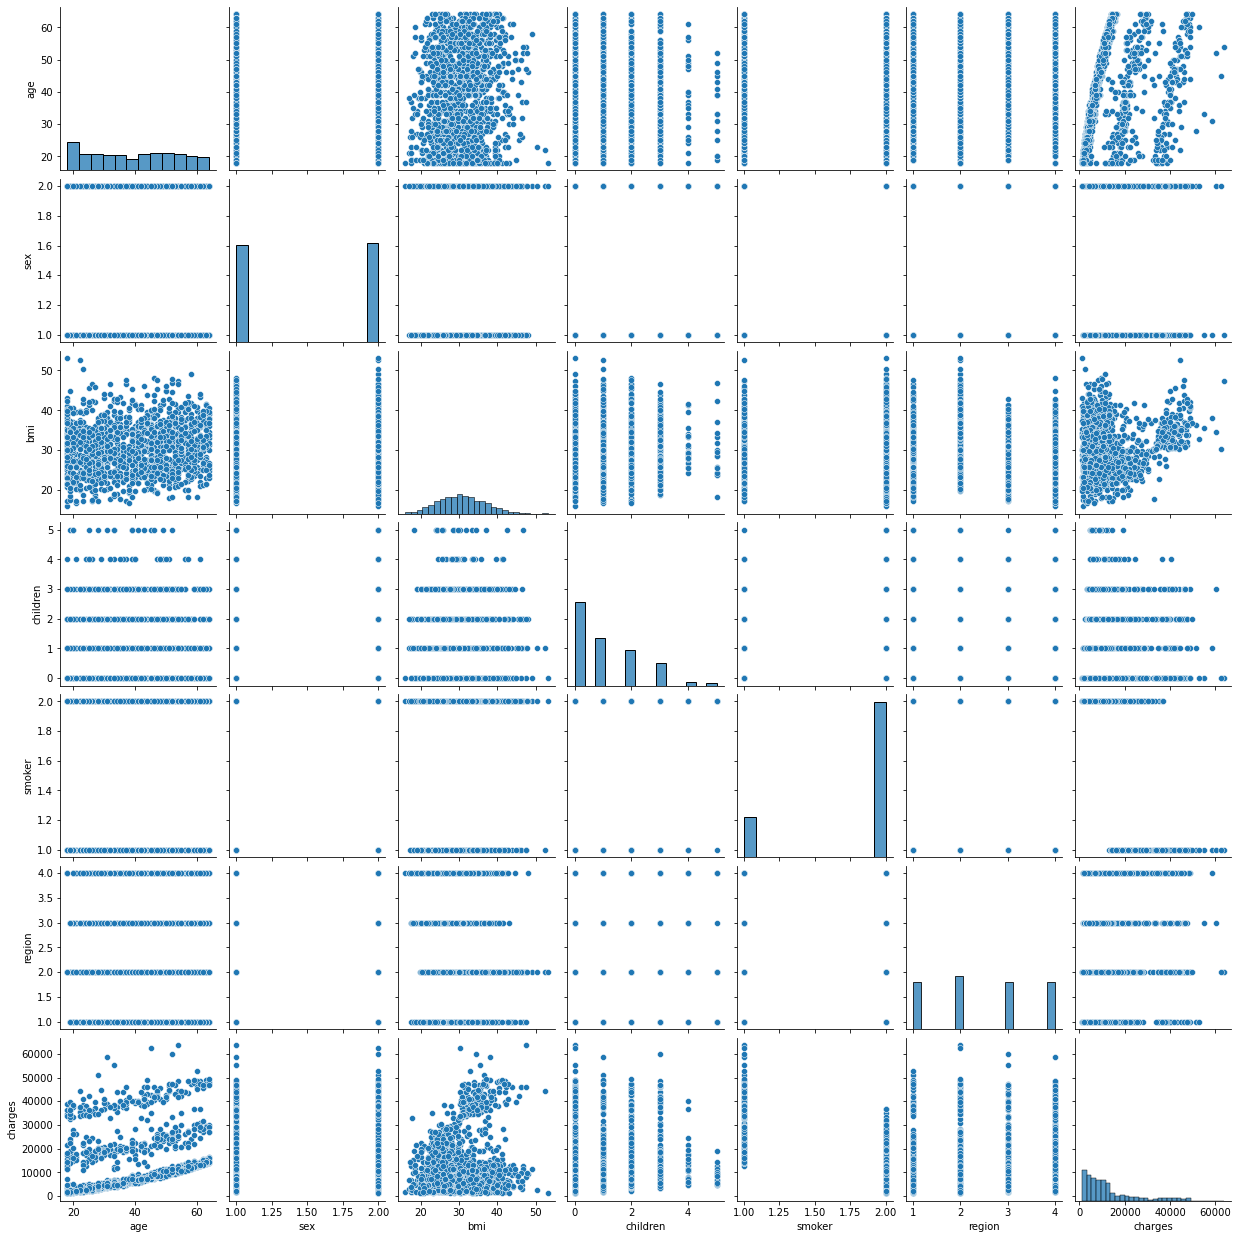

In [97]:
sns.pairplot(df)
plt.show()

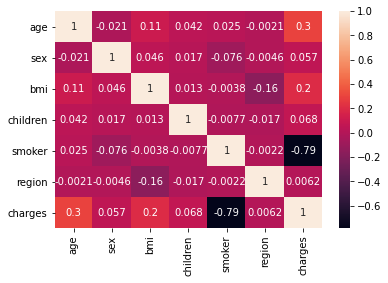

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [100]:
sns.heatmap(df.corr(), annot=True)
plt.show()
df.columns

## Ecuación normal

In [101]:
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [102]:
y=df['charges']

In [113]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, test_size=0.15, random_state=101)

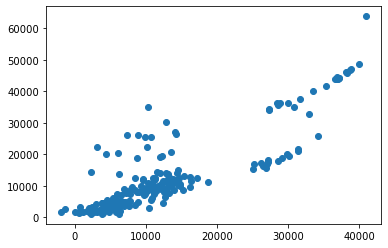

34131.4704586666
[   245.68112384     31.4890985     348.67324347    438.20643928
 -23757.0406645     351.38882942]


In [114]:
model = skl.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(predictions, y_test)
plt.show()
print(model.intercept_)
print(model.coef_)

#### $$\hat\theta = (X^TX)^{-1}X^Ty$$

In [115]:
m_len=len(y_train)
X_b = np.c_[np.ones((m_len, 1)), X_train]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [116]:
theta_best

array([ 3.41314705e+04,  2.45681124e+02,  3.14890985e+01,  3.48673243e+02,
        4.38206439e+02, -2.37570407e+04,  3.51388829e+02])

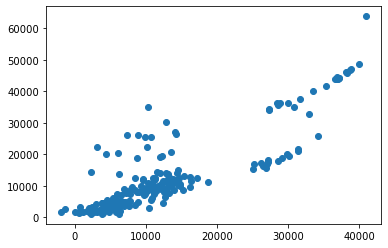

In [117]:
X_new = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred = np.matmul(X_new, theta_best)
plt.scatter(y_pred, y_test)
plt.show()

In [118]:
print(X_new.shape)
print(theta_best.shape)

(201, 7)
(7,)


## Stochastic Gradient Descent